# Using Beautiful Soup to Web Scrape 

The goal of any webscraping or data collection is:

1. 'grab' the data
2. 'process' the data
3. transform it into a pandas dataframe

As such, this demo will grab data from a website, extract data from its tables and then process it before transforming it into a pandas dataframe.

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROEYE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


To perform web scraping, you should also import the libraries shown below. The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [17]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [18]:
def get_article_counts(start_year, end_year):
    article_counts = {}
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            url = f"https://www.cnn.com/sitemaps/article-{year}-{month}.xml"
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'xml')
            count = len(soup.find_all('url'))
            article_counts[f"{year}-{month:02d}"] = count
    return article_counts


In [8]:
article_counts = get_article_counts(2017, 2022)
print("Article Counts Per Month:")
for year_month, count in article_counts.items():
    print(f"{year_month}: {count}")

Article Counts Per Month:
2017-01: 2243
2017-02: 2057
2017-03: 2430
2017-04: 2233
2017-05: 2463
2017-06: 2508
2017-07: 2369
2017-08: 2439
2017-09: 2287
2017-10: 2233
2017-11: 2155
2017-12: 2033
2018-01: 2601
2018-02: 2455
2018-03: 2829
2018-04: 2569
2018-05: 2645
2018-06: 2697
2018-07: 2481
2018-08: 2378
2018-09: 2417
2018-10: 3136
2018-11: 3103
2018-12: 2593
2019-01: 3236
2019-02: 2960
2019-03: 3238
2019-04: 3651
2019-05: 3656
2019-06: 3783
2019-07: 3946
2019-08: 3520
2019-09: 3706
2019-10: 4119
2019-11: 2371
2019-12: 3238
2020-01: 3887
2020-02: 3637
2020-03: 3853
2020-04: 3793
2020-05: 3718
2020-06: 3904
2020-07: 3921
2020-08: 3603
2020-09: 3574
2020-10: 3677
2020-11: 3063
2020-12: 2998
2021-01: 3375
2021-02: 3204
2021-03: 3461
2021-04: 3256
2021-05: 3183
2021-06: 3174
2021-07: 3026
2021-08: 2878
2021-09: 2869
2021-10: 3096
2021-11: 2815
2021-12: 2547
2022-01: 2727
2022-02: 2351
2022-03: 2637
2022-04: 2440
2022-05: 2486
2022-06: 2596
2022-07: 2474
2022-08: 2541
2022-09: 2560
2022-10:

Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser whose details you do not need to worry about at this point.

Year: 2018


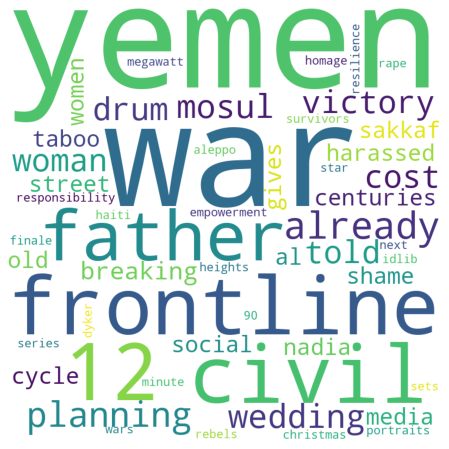

[('yemen', 2), ('war', 2), ('frontline', 1), ('civil', 1), ('12', 1), ('father', 1), ('already', 1), ('planning', 1), ('wedding', 1), ('mosul', 1), ('victory', 1), ('cost', 1), ('told', 1), ('drum', 1), ('woman', 1), ('breaking', 1), ('centuries', 1), ('old', 1), ('taboo', 1), ('cycle', 1)]
Year: 2019


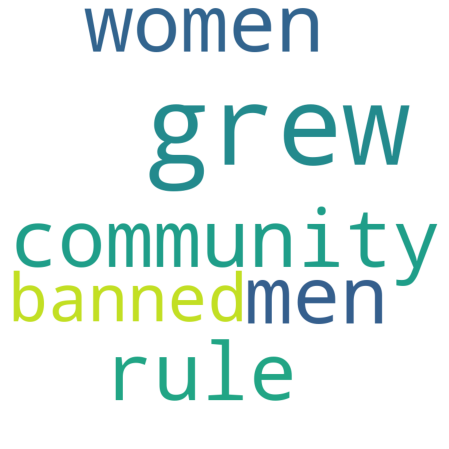

[('grew', 1), ('community', 1), ('women', 1), ('rule', 1), ('men', 1), ('banned', 1)]
Year: 2020


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [5]:
def analyze_year(year):
    url = f"https://www.cnn.com/sitemaps/article-{year}-01.xml"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    urls = [u.find('loc').text for u in soup.find_all('url')]
    titles = []
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        title = soup.find('h1', class_=re.compile('.*pg-headline.*'))
        if title is not None:
            titles.append(title.text.strip())
    text = ' '.join(titles)
    words = re.findall(r'\b\w+\b', text.lower())
    stopwords = set(nltk.corpus.stopwords.words('english'))
    filtered_words = [word for word in words if word not in stopwords]
    word_freq = Counter(filtered_words)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return word_freq

for year in range(2018, 2022+1):
    print(f"Year: {year}")
    word_freq = analyze_year(year)
    print(word_freq.most_common(20))


Year: 2018


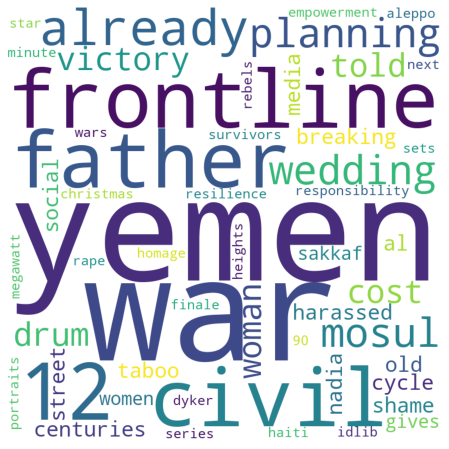

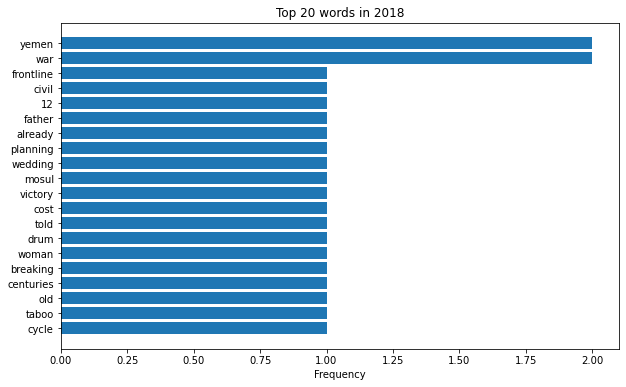

[('yemen', 2), ('war', 2), ('frontline', 1), ('civil', 1), ('12', 1), ('father', 1), ('already', 1), ('planning', 1), ('wedding', 1), ('mosul', 1), ('victory', 1), ('cost', 1), ('told', 1), ('drum', 1), ('woman', 1), ('breaking', 1), ('centuries', 1), ('old', 1), ('taboo', 1), ('cycle', 1)]
Year: 2019


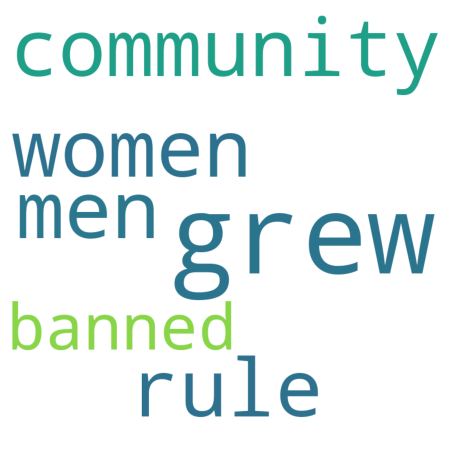

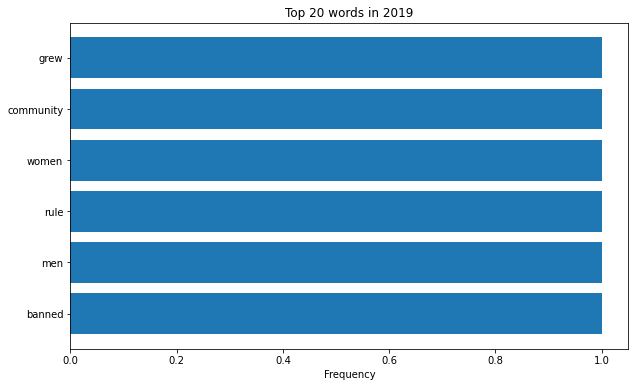

[('grew', 1), ('community', 1), ('women', 1), ('rule', 1), ('men', 1), ('banned', 1)]
Year: 2020


ConnectionError: HTTPSConnectionPool(host='www.cnn.com', port=443): Max retries exceeded with url: /2020/01/08/business/boeing-iran-crash/index.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000022AB5BDDA60>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network'))

In [14]:
def analyze_year(year):
    url = f"https://www.cnn.com/sitemaps/article-{year}-01.xml"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    urls = [u.find('loc').text for u in soup.find_all('url')]
    titles = []
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        title = soup.find('h1', class_=re.compile('.*pg-headline.*'))
        if title is not None:
            titles.append(title.text.strip())
    text = ' '.join(titles)
    words = re.findall(r'\b\w+\b', text.lower())
    stopwords = set(nltk.corpus.stopwords.words('english'))
    filtered_words = [word for word in words if word not in stopwords]
    word_freq = Counter(filtered_words)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    top_words = dict(word_freq.most_common(20))
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_words)), list(top_words.values()), align='center')
    plt.yticks(range(len(top_words)), list(top_words.keys()))
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.title(f'Top 20 words in {year}')
    plt.show()
    return word_freq

for year in range(2018, 2022+1):
    print(f"Year: {year}")
    word_freq = analyze_year(year)
    print(word_freq.most_common(20))


In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [19]:
article_counts = get_article_counts(2018, 2022)
print(article_counts)


{'2018-01': 2601, '2018-02': 2455, '2018-03': 2829, '2018-04': 2569, '2018-05': 2645, '2018-06': 2697, '2018-07': 2481, '2018-08': 2378, '2018-09': 2417, '2018-10': 3136, '2018-11': 3103, '2018-12': 2593, '2019-01': 3236, '2019-02': 2960, '2019-03': 3238, '2019-04': 3651, '2019-05': 3656, '2019-06': 3783, '2019-07': 3946, '2019-08': 3520, '2019-09': 3706, '2019-10': 4119, '2019-11': 2371, '2019-12': 3238, '2020-01': 3887, '2020-02': 3637, '2020-03': 3854, '2020-04': 3793, '2020-05': 3718, '2020-06': 3904, '2020-07': 3921, '2020-08': 3603, '2020-09': 3574, '2020-10': 3677, '2020-11': 3063, '2020-12': 2998, '2021-01': 3375, '2021-02': 3204, '2021-03': 3461, '2021-04': 3256, '2021-05': 3183, '2021-06': 3174, '2021-07': 3026, '2021-08': 2878, '2021-09': 2869, '2021-10': 3096, '2021-11': 2815, '2021-12': 2547, '2022-01': 2727, '2022-02': 2351, '2022-03': 2641, '2022-04': 2441, '2022-05': 2487, '2022-06': 2597, '2022-07': 2475, '2022-08': 2541, '2022-09': 2560, '2022-10': 2704, '2022-11': 25

You can also get the text of the webpage and quickly print it out to check if it is what you expect.

In [6]:
# Print out the text
text = soup.get_text()
print(text)



https://www.cnn.com/2011/10/31/justice/california-conrad-murray-trial/index.html
2011-10-31T23:55:28Z
daily
0.5

https://i2.cdn.turner.com/cnnnext/dam/assets/111031064541-murray-defense-end-story-top.jpg
Dr. Conrad Murray must decide by Tuesday if he&apos;ll testify



https://www.cnn.com/2011/10/31/us/florida-nasa-boeing-partnership/index.html
2011-10-31T22:58:23Z
daily
0.5

https://i2.cdn.turner.com/cnnnext/dam/assets/111031101212-nasa-boeing-partnership-story-top.jpg
Boeing brings new jobs to Florida&apos;s Space Coast



https://www.cnn.com/2011/10/29/world/7-billion/index.html
2011-10-31T22:41:32Z
daily
0.5


https://www.cnn.com/2011/10/31/studentnews/sn-transcript-tue/index.html
2011-10-31T22:14:58Z
daily
0.5


https://www.cnn.com/2011/10/31/world/africa/sudan-fighting/index.html
2011-10-31T22:02:11Z
daily
0.5


https://www.cnn.com/2011/10/31/world/americas/canada-riots/index.html
2011-10-31T21:57:46Z
daily
0.5

https://i2.cdn.turner.com/cnnnext/dam/assets/111031085204-canada-r